## Les données

Nous utiliserons des données provenant d'un ensemble de données Kaggle :

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Colonnes Features (caractéristiques)
    
* id - ID unique pour chaque maison vendue
* date - Date de la vente de la maison
* price - Prix de chaque maison vendue
* bedrooms - Nombre de chambres
* bathrooms - Nombre de salles de bains, où 0,5 correspond à une chambre avec toilettes mais sans douche
* sqft_living - Superficie habitable
* sqft_lot - Superficie du terrain
* floors - Nombre d'étages
* waterfront - Une variable dummy (fictive) indiquant si l'appartement donnait sur le front de mer ou non
* view - Un indice de 0 à 4 de la qualité de la vue de la propriété
* condition - Un indice de 1 à 5 sur l'état de l'appartement
* grade - Un indice de 1 à 13, où 1-3 a un niveau de qualité faible de construction et de conception des bâtiments, 7 a un niveau moyen de construction et de conception, et 11-13 a un niveau de qualité élevé de construction et de conception
* sqft_above - La superficie de l'espace intérieur du logement qui est au-dessus du niveau du sol
* sqft_basement - La superficie de l'espace intérieur du logement qui se trouve sous le niveau du sol
* yr_built - L'année où la maison a été initialement construite
* yr_renovated - L'année de la dernière rénovation de la maison
* zipcode - Dans quelle zone de code postal se trouve la maison
* lat - Latitude
* long - Longitude
* sqft_living15 - La superficie de l'espace intérieur de l'habitation pour les 15 voisins les plus proches
* sqft_lot15 - La superficie du terrains des 15 voisins les plus proches

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

# Analyse des données

In [214]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [218]:
# Compter le nombre total de valeurs manquantes dans chaque colonne du DataFrame
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [220]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [144]:
# on remarque que df['date'] est de type object, on va donc le convertir en datetime
df['date'] = pd.to_datetime(df['date'])

In [145]:
# Définir le format des nombres à afficher sans notation scientifique
pd.options.display.float_format = '{:.2f}'.format

# Générer les statistiques descriptives du DataFrame et transposer le résultat pour une meilleure lisibilité
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,21597.00,4580474287.77,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00,2876735715.75
date,21597,2014-10-29 04:20:38.171968512,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21597.00,540296.57,78000.00,322000.00,450000.00,645000.00,7700000.00,367368.14
bedrooms,21597.00,3.37,1.00,3.00,3.00,4.00,33.00,0.93
bathrooms,21597.00,2.12,0.50,1.75,2.25,2.50,8.00,0.77
sqft_living,21597.00,2080.32,370.00,1430.00,1910.00,2550.00,13540.00,918.11
sqft_lot,21597.00,15099.41,520.00,5040.00,7618.00,10685.00,1651359.00,41412.64
floors,21597.00,1.49,1.00,1.00,1.50,2.00,3.50,0.54
waterfront,21597.00,0.01,0.00,0.00,0.00,0.00,1.00,0.09
view,21597.00,0.23,0.00,0.00,0.00,0.00,4.00,0.77


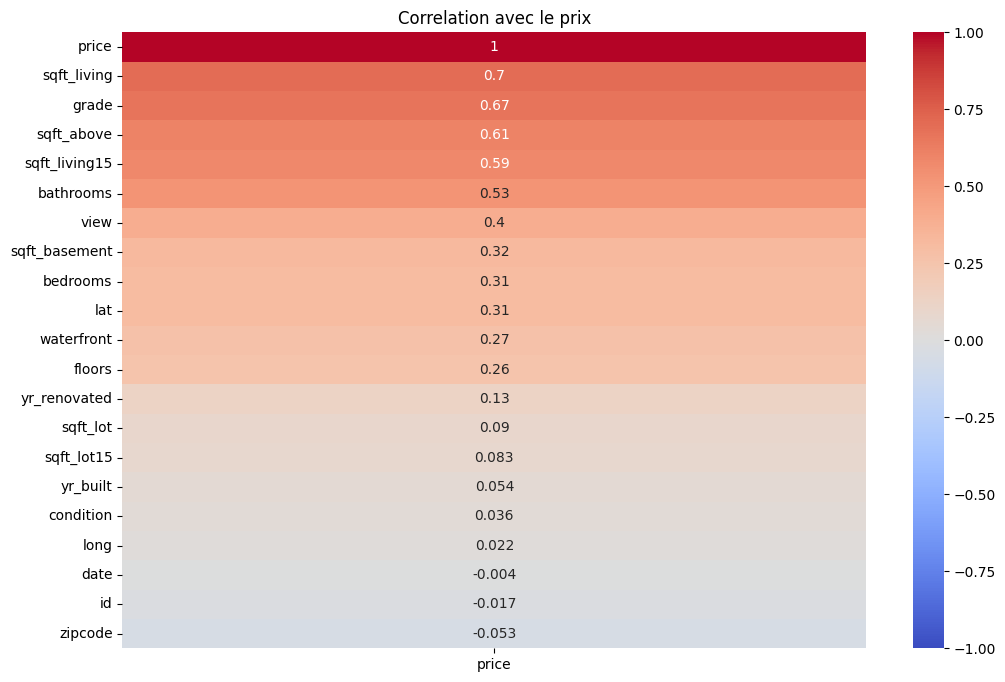

In [146]:
# Calcule de la matrice de corrélation
corr_matrix = df.corr()

# Tri de la matrice de corrélation par rapport à la colonne 'price' en ordre décroissant
corr_with_price = corr_matrix['price'].sort_values(ascending=False)

# Création de la heatmap de la matrice de corrélation triée avec le prix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.loc[corr_with_price.index, ['price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation avec le prix')
plt.show()

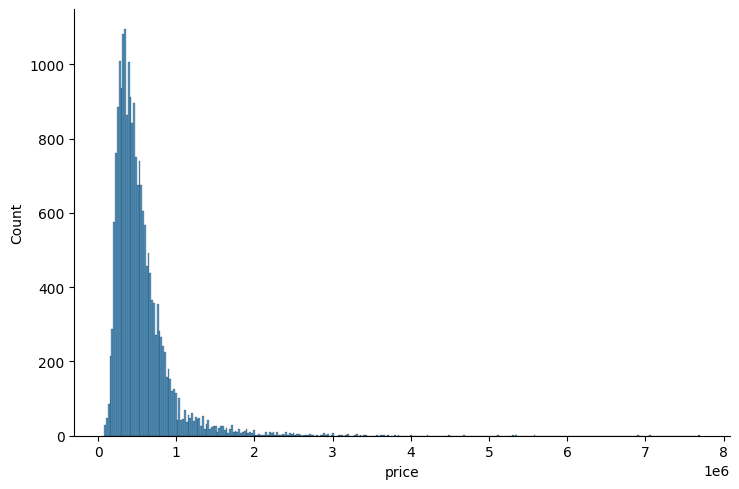

In [147]:
# Voir la distribution de la variable 'price'
sns.displot(df['price'], height=5, aspect=1.5);

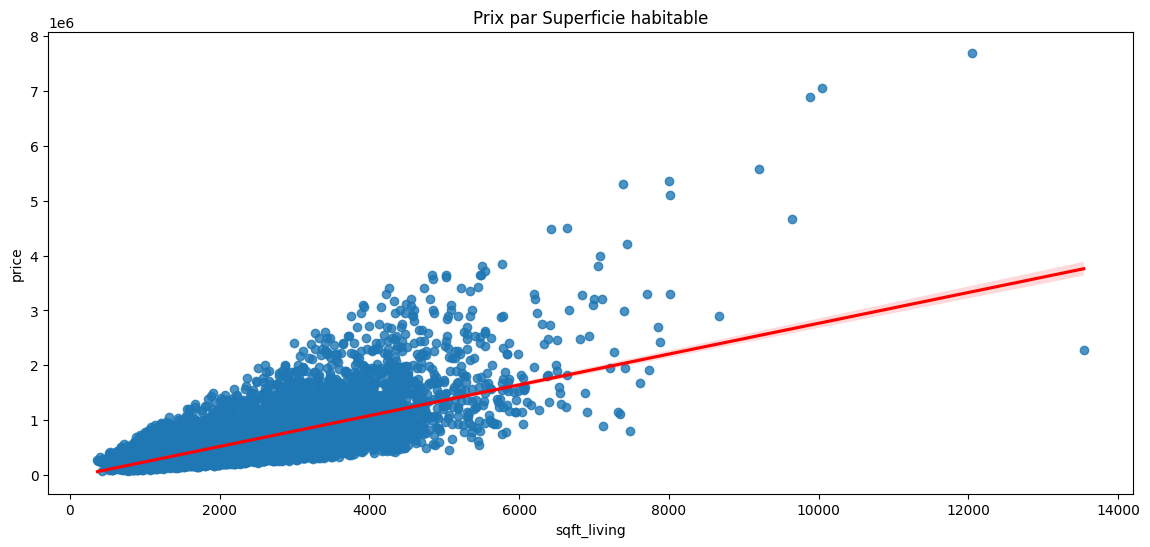

In [148]:
# On voit une grosse corrélation entre le prix et la superficie habitable
# affichons un scatterplot pour voir cela
plt.figure(figsize=(14, 6))
sns.regplot(x='sqft_living', y='price', data=df, line_kws={"color": "red"})
plt.title("Prix par Superficie habitable")
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

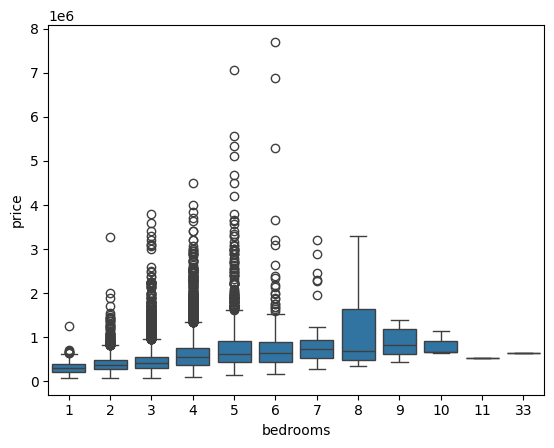

In [149]:
# Créer un boxplot pour visualiser la distribution des prix ('price') pour chaque nombre de chambres ('bedrooms')
# Chaque boîte sur le graphique représente un nombre différent de chambres (axe des x)
# Pour chaque boîte, la ligne du milieu représente la médiane du prix (le prix au milieu de la distribution pour ce nombre de chambres)
# La boîte s'étend du premier quartile (25% des données) au troisième quartile (75% des données), ce qui signifie que la moitié des prix pour ce nombre de chambres se situe dans cette plage
# Les "moustaches" qui s'étendent à partir de la boîte montrent la plage de la plupart des autres données
# Les points au-delà des moustaches sont considérés comme des valeurs aberrantes (prix inhabituellement élevés ou bas pour ce nombre de chambres)
sns.boxplot(x="bedrooms", y="price", data=df)

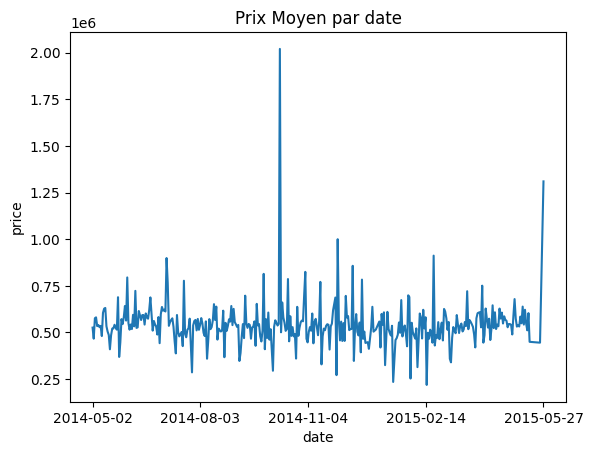

In [150]:
# Average price per year
average_price_per_year = df.groupby('date')['price'].mean().reset_index()

# Select 4 dates to display on x-axis, ensuring the last date is included
selected_dates = pd.concat([average_price_per_year['date'][::len(average_price_per_year)//4], average_price_per_year['date'][-1:]])

sns.lineplot(x='date', y='price', data=average_price_per_year)
plt.xticks(selected_dates)
plt.title('Prix Moyen par date')
plt.show()

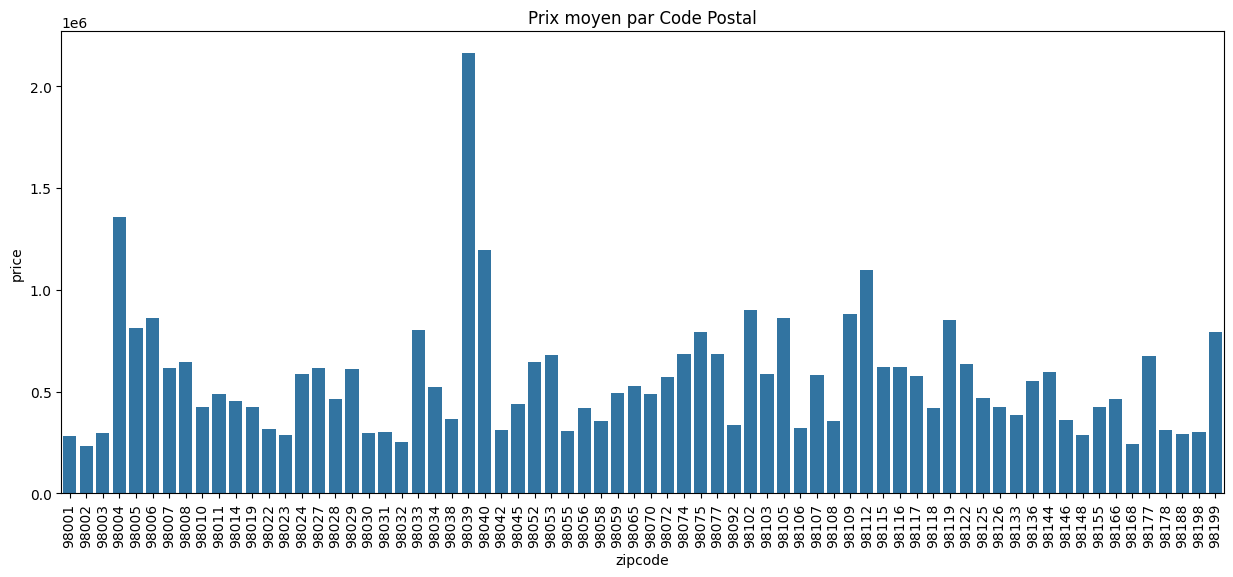

In [151]:
# Average price per zipcode
plt.figure(figsize=(15, 6))
zipcode_prices = df.groupby('zipcode')['price'].mean().sort_values()
sns.barplot(x=zipcode_prices.index, y=zipcode_prices)
plt.xticks(rotation=90)
plt.title('Prix moyen par Code Postal')  # Add title
plt.show()

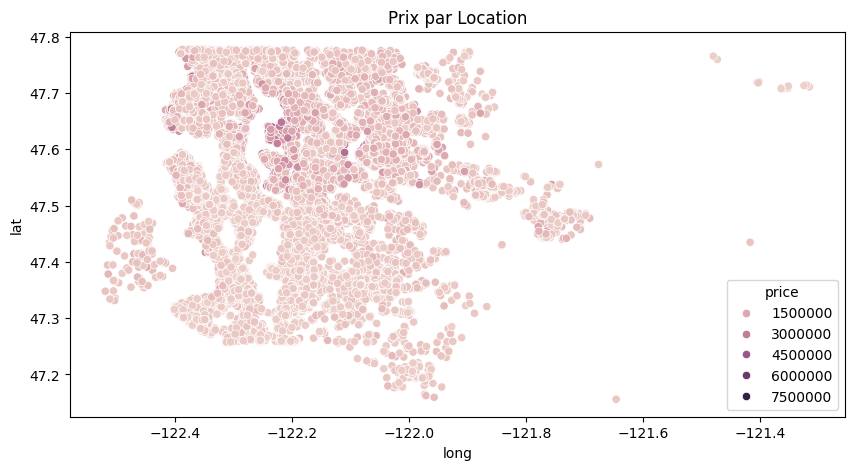

In [152]:
# Price vs. Location
plt.figure(figsize=(10, 5))
sns.scatterplot(x='long', y='lat', hue='price', data=df)
plt.title('Prix par Location')
plt.show()

In [153]:
df["year"] = df["date"].apply(lambda x: x.year)
print(df["year"].unique())
df["month"] = df["date"].apply(lambda x: x.month)
print(sorted(df["month"].unique()))

[2014 2015]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


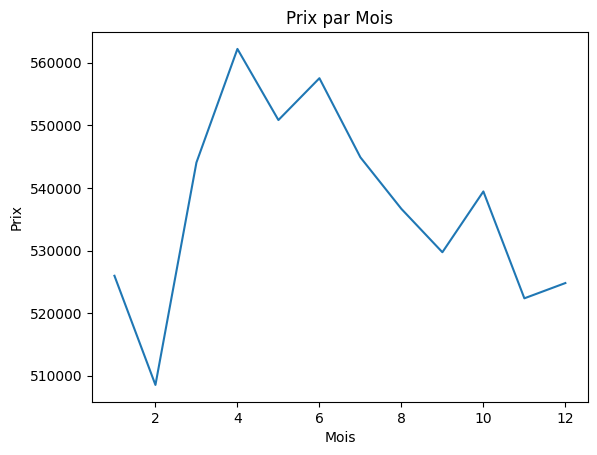

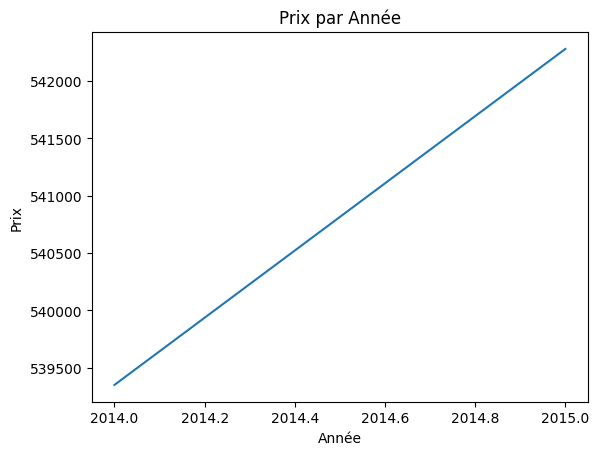

In [154]:
# Prix par mois
prix_par_mois = df.groupby('month')['price'].mean()
prix_par_mois.plot(kind='line')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.title('Prix par Mois')
plt.show()

prix_par_annee = df.groupby('year')['price'].mean()
prix_par_annee.plot(kind='line')
plt.xlabel('Année')
plt.ylabel('Prix')
plt.title('Prix par Année')
plt.show()


## Feature engineering

In [155]:
# colonnes inutiles
df = df.drop(['id'], axis=1)
df = df.drop(['date'], axis=1)

In [156]:
# afficher les types de données
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
dtype: object

In [157]:
df["zipcode"].nunique()

70

In [158]:
# 70 de zipcodes, si on utilise la méthode get_dummies cela va créer beaucoup de colonnes et donc beaucoup de calculs pour le modèle. nous allons donc les supprimer
df = df.drop(['zipcode'], axis=1)

In [159]:
# Nous voyons beaucoup de valeurs à 0 ce qui signifie qu'il n'y a pas de sous-sol et pas de rénovation
print(df['yr_renovated'].value_counts())
print(df['sqft_basement'].value_counts())

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64
sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64


## Normalisation

In [160]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)

(15117, 19)
(6480, 19)


In [161]:
from sklearn.preprocessing import MinMaxScaler

# Créer le scaler
scaler = MinMaxScaler()

# Ajuster le scaler et transformer les ensembles d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformer l'ensemble de test
X_test = scaler.transform(X_test)
print(X_train[0])
print(X_test[0])

[0.3        0.08       0.19855222 0.00350125 0.2        0.
 1.         0.75       0.4        0.23701731 0.02904564 0.1826087
 0.         0.70098118 0.19019934 0.34262605 0.00657863 0.
 0.72727273]
[0.1        0.08       0.04239917 0.00469519 0.         0.
 0.         0.75       0.3        0.05459387 0.         0.20869565
 0.         0.87518096 0.18189369 0.31337119 0.00887725 0.
 0.63636364]


In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X_train.shape

(15117, 19)

In [173]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=['mae'])

In [174]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback with a patience of 3
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Fit the model with the added callbacks
model.fit(X_train, y_train, epochs=500, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
119/119 [==============================] - 2s 6ms/step - loss: 430238171136.0000 - mae: 542494.4375 - val_loss: 418903293952.0000 - val_mae: 535062.3125
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 428869091328.0000 - mae: 541310.7500 - val_loss: 413995171840.0000 - val_mae: 530763.8750
Epoch 3/500
119/119 [==============================] - 0s 3ms/step - loss: 407724130304.0000 - mae: 522835.7188 - val_loss: 365061373952.0000 - val_mae: 486056.4688
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 306558631936.0000 - mae: 420513.4688 - val_loss: 210346885120.0000 - val_mae: 308818.2812
Epoch 5/500
119/119 [==============================] - 0s 4ms/step - loss: 147361136640.0000 - mae: 226308.1719 - val_loss: 100368326656.0000 - val_mae: 184878.7969
Epoch 6/500
119/119 [==============================] - 0s 3ms/step - loss: 99828350976.0000 - mae: 196767.6250 - val_loss: 95007637504.0000 - val_mae: 195554.6875
Epoch 7/500


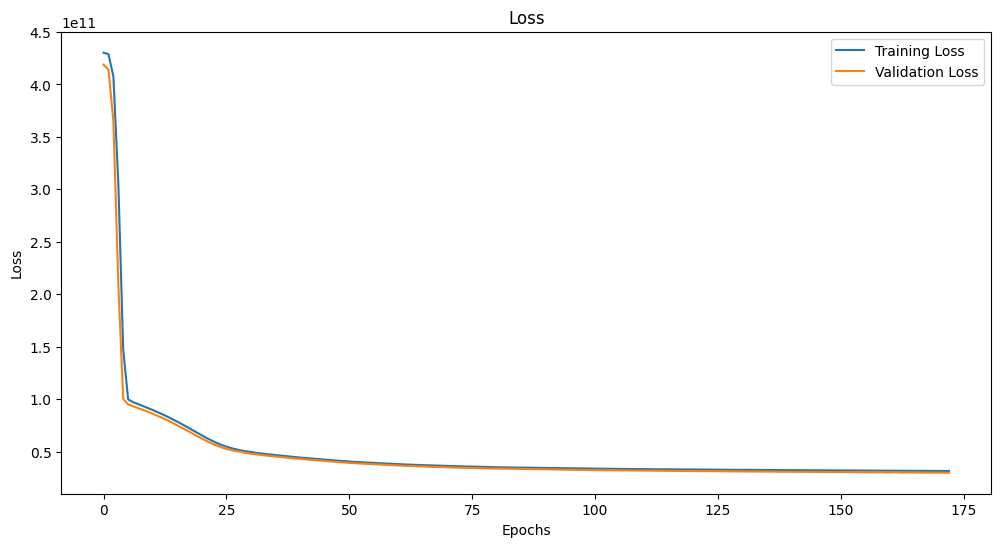

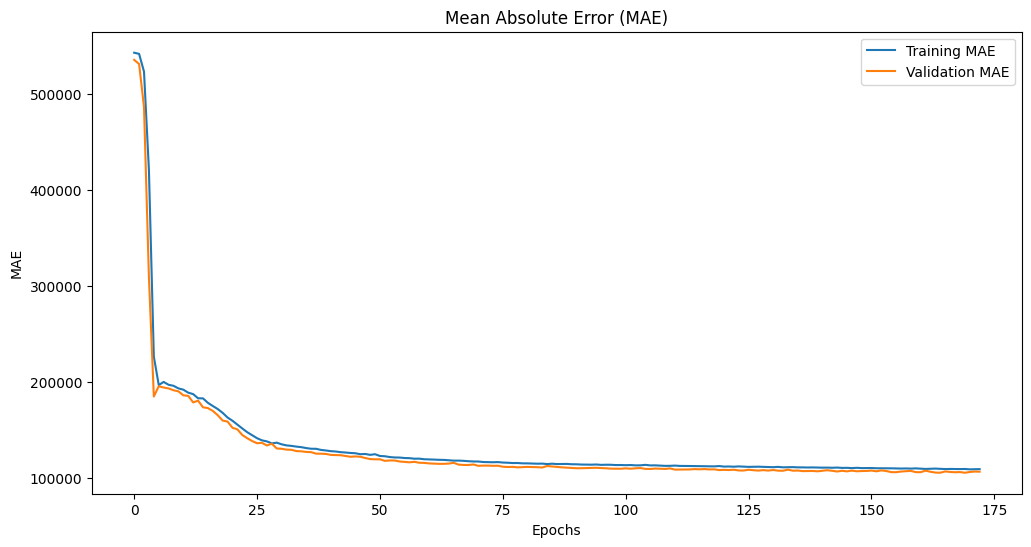

In [175]:
# Plotting the loss
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the MAE
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['mae'], label='Training MAE')
plt.plot(model.history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

mean_price = df["price"].mean()

mae_percentage = (mae / mean_price) * 100
rmse_percentage = (rmse / mean_price) * 100

print(f"MAE: {mae:.2f} ({mae_percentage:.2f}%)")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} ({rmse_percentage:.2f}%)")
print(f"Variances expliqués: {explained_variance_score(y_test, predictions) * 100:.2f}%") # Le score de 79% signifie que votre modèle, lorsqu'il fait des prédictions, est capable d'expliquer 79% des variations ou des changements dans votre variable cible (prix des maisons).
df["price"].describe()

203/203 [==============================] - 0s 1ms/step
MAE: 106637.09 (19.74%)
MSE: 29969480741.38
RMSE: 173116.96 (32.04%)
Variances expliqués: 77.47%


count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

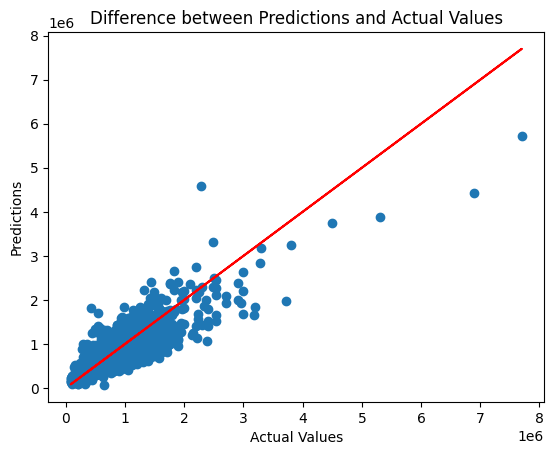

In [199]:
# Nos prédictions
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r') # La ligne rouge est la ligne parfaite
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Difference between Predictions and Actual Values')
plt.show()

# On est bon pour les maisons qui ont un prix inférieur à 2 million de dollars mais après on voit que les prédictions sont moins bonnes

## Sauvegarde

In [200]:
from tensorflow.keras.models import load_model
model.save("my_model.keras")
mode = load_model("my_model.keras") 

## Prédire sur de toutes nouvelles données

In [209]:
# Create a new dataframe with the input data
new_data = pd.DataFrame({'bedrooms': [3], 'bathrooms': [2], 'sqft_living': [1500], 'sqft_lot': [5000], 'floors': [2], 'waterfront': [0], 'view': [0], 'condition': [3], 'grade': [7], 'sqft_above': [1200], 'sqft_basement': [300], 'yr_built': [2000], 'yr_renovated': [0], 'lat': [47.6], 'long': [-122.3], 'sqft_living15': [1600], 'sqft_lot15': [4500], 'year': [2022], 'month': [8]})
new_data.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,3,2,1500,5000,2,0,0,3,7,1200,300,2000,0,47.60,-122.30,1600,4500,2022,8


In [212]:

# Reorder the columns to match the order during model training
new_data = new_data[X.columns]

# Normalize the input data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make predictions using the model
predicted_price = model.predict(new_data_scaled)

# Print the predicted price
print(f"Predicted price: {predicted_price[0][0]:.2f}$")

1/1 [==============================] - 0s 31ms/step
Predicted price: 691955.38$
